In [1]:
import os
import pandas as pd
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import altair as alt
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression

In [2]:
df= pd.read_csv('spreadspoke_scores.csv',
                 encoding='utf-8')
df.tail()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME
13231,2/13/2022,2021,Superbowl,True,Los Angeles Rams,NaN,NaN,Cincinnati Bengals,LAR,-4.0,48.5,SoFi Stadium,True,72.0,0.0,NaN,DOME


In [3]:
df= pd.read_csv('spreadspoke_scores.csv',
                 encoding='utf-8')
sum_column = df["score_home"] + df["score_away"]
df["Total Score"] = sum_column
columns = ["schedule_date","schedule_week","schedule_playoff","team_favorite_id","spread_favorite",
          "stadium","weather_detail","stadium_neutral", "score_home","score_away","team_home","team_away"]
df.drop(columns= columns,inplace=True) 
df.head()

,schedule_season,over_under_line,weather_temperature,weather_wind_mph,weather_humidity,Total Score
0,1966,NaN,83.0,6.0,71.0,37.0
1,1966,NaN,81.0,7.0,70.0,52.0
2,1966,NaN,70.0,7.0,82.0,34.0
3,1966,NaN,82.0,11.0,78.0,33.0
4,1966,NaN,64.0,8.0,62.0,27.0


In [4]:
#new_df_2019 = df[df['schedule_season'] >= 1999]
#new_df_2019 = new_df_2019[new_df_2019['schedule_season'] < 2020] 
new_df_2019 = df 
print(len(new_df_2019)*.8) 
print(len(new_df_2019)*.2)

10585.6
2646.4


In [5]:
new_df_2019['over_under_line'].replace(' ',"NaN", inplace=True)
new_df_2019['Over Hit'] = new_df_2019[['Total Score']].sum(axis=1) > new_df_2019[['over_under_line']].sum(axis=1) 
new_df_2019['Over Hit'] = new_df_2019["Over Hit"].astype(int) 
new_df_2019.dropna(inplace=True)

In [6]:
new_df_2019

,schedule_season,over_under_line,weather_temperature,weather_wind_mph,weather_humidity,Total Score,Over Hit
350,1967,43,60.0,12.0,74.0,47.0,1
538,1968,40,66.0,12.0,80.0,23.0,0
727,1969,39,55.0,14.0,84.0,30.0,0
916,1970,36,59.0,11.0,60.0,29.0,0
1105,1971,34,34.0,18.0,40.0,27.0,0
...,...,...,...,...,...,...,...
13225,2021,47.0,15.0,12.0,53.0,23.0,0
13226,2021,48.5,35.0,0.0,43.0,35.0,0
13227,2021,54.0,35.0,6.0,54.0,78.0,1
13228,2021,48.0,50.0,11.0,69.0,57.0,1


In [7]:
len(new_df_2019)

6342

In [17]:
Y_train_OU  =  new_df_2019.iloc[0:2646,6].values 
# instances in the dataset extracting specifically for the Spread Favorite to train
X_train_OU = new_df_2019.iloc[0:2646, 0:6].values
# instances in the dataset for all other features to test


Y_test_OU= new_df_2019.iloc[2646: ,6].values # instances in the dataset extracting specifically for the Spread Favorite to test
x_test_OU = new_df_2019.iloc[2646: ,0:6].values # instances in the dataset for all other features to test

# Y_train_OU
# Y_train_spread
# x_test
# X_train_OU

In [18]:
alpha = [.0001, .001, .01, .1, 1, 10, 100, 500, 1000, 5000] 
results=[]


for i,k in enumerate(alpha):
    classifier = SGDClassifier(loss='log', max_iter=1000, alpha=alpha[i], tol=1.0e-12, random_state=123, eta0=100, average=False)
    classifier.fit(X_train_OU, Y_train_OU)
    
    accuracy = accuracy_score(Y_train_OU, classifier.predict(X_train_OU))
    
    results.append({"alpha":alpha[i], "accuracy":accuracy})

df_chart = pd.DataFrame(results) # graph it to easily see which alapha had the most accuracy
alt.Chart(df_chart).mark_line().encode(
    alt.X('alpha',
          scale=alt.Scale(type='log')),
    y='accuracy'
) 

alt.Chart(...)

In [19]:
alpha = [.05,.1,.2,.3] 
results=[]


for i,k in enumerate(alpha):
    classifier = SGDClassifier(loss='log', max_iter=1000, alpha=alpha[i], tol=1.0e-12, random_state=123, eta0=100, average=False)
    classifier.fit(X_train_OU, Y_train_OU)
    
    accuracy = accuracy_score(Y_train_OU, classifier.predict(X_train_OU))
    
    results.append({"alpha":alpha[i], "accuracy":accuracy})

df_chart = pd.DataFrame(results) # graph it to easily see which alapha had the most accuracy
alt.Chart(df_chart).mark_line().encode(
    alt.X('alpha'),
    y='accuracy'
)

alt.Chart(...)

In [20]:
import pprint as pp

eta = [10, 100, 1000, 10000]
power_t = [.5, 1, 2, 3, 4, 5]
iterations= []
results = []

for i,k in enumerate(eta):
    for j,l in enumerate(power_t):
        classifier = SGDClassifier(loss='log', max_iter=1000, learning_rate="invscaling", tol=1.0e-12, alpha=.03, 
                                   power_t=power_t[j], random_state=123, eta0=eta[i], average=False)
        classifier.fit(X_train_OU, Y_train_OU)
        iterations = classifier.n_iter_
        test_accuracy = accuracy_score(Y_train_OU, classifier.predict(X_train_OU))
        
        results.append({ "Eta":eta[i], "power_t":power_t[j],"Iterations":iterations, "Test Accuracy":test_accuracy})
#         print(eta[i])
#         print("-----")
#         print(power_t[j])

# pp.pprint(results)

df = pd.DataFrame(results)
alt.Chart(df).mark_bar().encode(
    alt.X('power_t',
          scale=alt.Scale(type='log')),
    y='Test Accuracy'
)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alt.Chart(...)

In [21]:
classifier = SGDClassifier(loss='log', max_iter=1000, learning_rate="invscaling", tol=1.0e-12, alpha=.1, 
                                   power_t=2, random_state=123, eta0=1000, average=False)
classifier.fit(X_train_OU, Y_train_OU)

SGDClassifier(alpha=0.1, eta0=1000, learning_rate='invscaling', loss='log',
              power_t=2, random_state=123, tol=1e-12)

In [22]:
print("Number of SGD iterations: %d" % classifier.n_iter_)
print("Training accuracy: %0.6f" % accuracy_score(Y_train_OU, classifier.predict(X_train_OU)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test_OU, classifier.predict(x_test_OU)))

Number of SGD iterations: 30
Training accuracy: 0.905518
Testing accuracy: 0.885281


In [23]:
overall_over = new_df_2019.iloc[:,5]
# overall_over
count=0

for thing in overall_over:
    if thing == 1:
        count+=1
        
print("Total over hitting " +str(round(count/len(overall_over)*100,2))+str("%"))

Total over hitting 0.0%


In [24]:
## Error analysis
count = 0


y_pred = classifier.predict(X_train_OU)
y_test_pred = classifier.predict(x_test_OU)
for thing in y_pred:
    if thing == 1:
        count+=1
        
count_test = 0
for thing in y_test_pred:
    if thing == 1:
        count_test+= 1
        
print("Total percent of over hitting in training: " +str(round(count/len(y_pred)*100,2))+str("%"))
print("Total percent of over hitting in test: " +str(round(count_test/len(y_test_pred)*100,2))+str("%"))




print(y_test_pred)
print("---------")
print(Y_test_OU)

Total percent of over hitting in training: 47.13%
Total percent of over hitting in test: 49.32%
[0 1 0 ... 1 1 1]
---------
[0 1 0 ... 1 1 0]


Feature: 0, Score: -1.21515
Feature: 1, Score: -1.98277
Feature: 2, Score: -3.54740
Feature: 3, Score: -0.03650
Feature: 4, Score: 7.45436
Feature: 5, Score: 45.76197


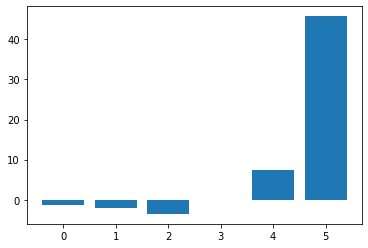

In [25]:
classifier = SGDClassifier(loss='log', max_iter=1000, learning_rate="invscaling", tol=1.0e-12, alpha=.1, 
                                   power_t=2, random_state=123, eta0=1000, average=False)
classifier.fit(X_train_OU, Y_train_OU)# get importance
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()